In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [30]:
df = pd.read_excel('churn.xlsx')

In [31]:
df.shape

(2801, 14)

In [32]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [33]:
df['TARGET'].value_counts(normalize=True)

0    0.864691
1    0.135309
Name: TARGET, dtype: float64

In [34]:
varc = [v for v in df.columns if v[:2]=='V_']
vard = [v for v in df.columns if v[:2]=='C_']

In [35]:
for v in vard:
    aux = df[[v,'TARGET']].copy()
    aux['n'] = 1
    aux = aux.pivot_table(index=v,columns='TARGET',aggfunc='count')
    aux.columns=aux.columns.droplevel()
    aux.reset_index(inplace=True)
    for i in range(2):
        aux[i]/=aux[i].sum()
    aux['woe'] =np.log(aux[0]/aux[1])
    df = df.merge(aux[['woe',v]],how='inner',on=v)
    df.rename(columns={'woe':'W_%s'%v},inplace=True)

In [36]:
for i,v in enumerate(varc):
    bestk = 0
    best_iv = 0
    for k in range(2,6):
        aux = df[[v,'TARGET']].copy()
        aux[v] = pd.cut(aux[v],bins=k,include_lowest=True).astype(str)
        aux['n'] = 1
        aux = aux.pivot_table(index=v,columns='TARGET',aggfunc='count')
        aux.columns=aux.columns.droplevel()
        aux.reset_index(inplace=True)
        for i in range(2):
            aux[i]/=aux[i].sum()
        aux['woe'] =np.log(aux[0]/aux[1])
        aux['iv'] = aux['woe']*(aux[0]-aux[1])
        if (aux['iv'].sum()> best_iv) & (~np.isinf(aux['iv'].sum())):
            best_iv = aux['iv'].sum()
            bestk = k 
    aux = df[[v,'TARGET']].copy()
    print("%s %.4f %d"%(v,best_iv,bestk))
    aux[v] = pd.cut(aux[v],bins=bestk,include_lowest=True).astype(str)
    aux['n'] = 1
    aux = aux.pivot_table(index=v,columns='TARGET',aggfunc='count')
    aux.columns=aux.columns.droplevel()
    aux.reset_index(inplace=True)
    for i in range(2):
        aux[i]/=aux[i].sum()
    aux['woe'] =np.log(aux[0]/aux[1])
    df[v] = pd.cut(df[v],bins=bestk,include_lowest=True).astype(str)
    df = df.merge(aux[['woe',v]],how='inner',on=v)
    df.rename(columns={'woe':'W_%s'%v},inplace=True)


V_ACCT_LGHT 0.0064 5
V_N_VM_MESS 0.1087 5
V_T_DAY_CHG 0.5527 5
V_T_EVE_CALLS 0.0086 4
V_T_EVE_CHG 0.0730 3
V_T_NIG_CALLS 0.0186 3
V_T_NIG_CHG 0.0214 4
V_T_INT_CALLS 0.0665 5
V_T_INT_CHG 0.0741 4
V_CS_CALLS 0.5640 5


In [37]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,...,W_V_ACCT_LGHT,W_V_N_VM_MESS,W_V_T_DAY_CHG,W_V_T_EVE_CALLS,W_V_T_EVE_CHG,W_V_T_NIG_CALLS,W_V_T_NIG_CHG,W_V_T_INT_CALLS,W_V_T_INT_CHG,W_V_CS_CALLS
0,"(121.8, 158.4]",No,Yes,"(17.2, 25.8]","(43.266, 51.88]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,0.061033,1.219037,-1.864202,0.040222,0.046092,0.12472,-0.037245,-0.29035,0.114628,0.295956
1,"(48.6, 85.2]",No,Yes,"(25.8, 34.4]","(26.038, 34.652]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,0.053118,0.205211,0.561314,0.040222,0.046092,0.12472,-0.037245,-0.29035,0.114628,0.295956
2,"(121.8, 158.4]",Yes,Yes,"(34.4, 43.0]","(26.038, 34.652]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,0.061033,0.524733,0.561314,0.040222,0.046092,0.12472,-0.037245,-0.29035,0.114628,0.295956
3,"(11.816, 48.6]",No,No,"(-0.044, 8.6]","(26.038, 34.652]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,0.119268,-0.147174,0.561314,0.040222,0.046092,0.12472,-0.037245,-0.29035,0.114628,0.295956
4,"(85.2, 121.8]",No,Yes,"(25.8, 34.4]","(17.424, 26.038]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,-0.066532,0.205211,0.233039,0.040222,0.046092,0.12472,-0.037245,-0.29035,0.114628,0.295956


In [38]:
varw = [v for v in df.columns if v[:2]=='W_']

In [39]:
varw

['W_C_IP',
 'W_C_VMP',
 'W_V_ACCT_LGHT',
 'W_V_N_VM_MESS',
 'W_V_T_DAY_CHG',
 'W_V_T_EVE_CALLS',
 'W_V_T_EVE_CHG',
 'W_V_T_NIG_CALLS',
 'W_V_T_NIG_CHG',
 'W_V_T_INT_CALLS',
 'W_V_T_INT_CHG',
 'W_V_CS_CALLS']

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [41]:
X = df[varw].copy()
y = df['TARGET'].copy()

In [42]:
Xt, Xv, yt, yv = train_test_split(X,y,train_size=0.7,test_size=0.3)

In [43]:
modelo = LogisticRegression()

In [44]:
%%time
modelo.fit(Xt,yt)

CPU times: user 10.4 ms, sys: 953 µs, total: 11.3 ms
Wall time: 10.8 ms


/home/jose/Documentos/rubik/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
print(roc_auc_score(y_score=modelo.predict_proba(Xt)[:,1],y_true=yt))
print(roc_auc_score(y_score=modelo.predict_proba(Xv)[:,1],y_true=yv))

0.8699449487016899
0.8863436385255649


In [46]:
betas = list(modelo.coef_[0])
alpha = modelo.intercept_[0]

In [47]:
PDO = 30
base_odds = 4
base_score = 800

factor = PDO/np.log(2)
offset = base_score-factor*np.log(base_odds)
n = len(varw)

In [48]:
for k,v in enumerate(varw):
    df['P_%s'%v[2:]] = ((df[v]*betas[k]+alpha/n)*factor+offset/n).astype(int)

In [49]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,...,P_V_ACCT_LGHT,P_V_N_VM_MESS,P_V_T_DAY_CHG,P_V_T_EVE_CALLS,P_V_T_EVE_CHG,P_V_T_NIG_CALLS,P_V_T_NIG_CHG,P_V_T_INT_CALLS,P_V_T_INT_CHG,P_V_CS_CALLS
0,"(121.8, 158.4]",No,Yes,"(17.2, 25.8]","(43.266, 51.88]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,53,16,150,53,52,53,57,65,48,39
1,"(48.6, 85.2]",No,Yes,"(25.8, 34.4]","(26.038, 34.652]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,53,48,26,53,52,53,57,65,48,39
2,"(121.8, 158.4]",Yes,Yes,"(34.4, 43.0]","(26.038, 34.652]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,53,38,26,53,52,53,57,65,48,39
3,"(11.816, 48.6]",No,No,"(-0.044, 8.6]","(26.038, 34.652]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,52,59,26,53,52,53,57,65,48,39
4,"(85.2, 121.8]",No,Yes,"(25.8, 34.4]","(17.424, 26.038]","(76.5, 100.0]","(13.533, 20.327]","(87.0, 117.0]","(8.935, 11.618]","(0.987, 3.4]",...,56,48,43,53,52,53,57,65,48,39


In [50]:
varp = [v for v in df.columns if v[:2]=='P_']

In [51]:
df['score'] = df[varp].sum(axis=1)

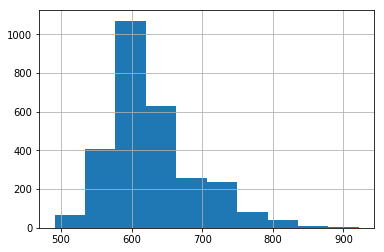

In [52]:
df['score'].hist()

In [53]:
df['score'].describe()

count    2801.000000
mean      628.494466
std        61.647107
min       491.000000
25%       590.000000
50%       614.000000
75%       653.000000
max       922.000000
Name: score, dtype: float64

In [54]:
for v in varw:    
    print(df[['P_'+v[2:],v[2:]]].groupby(v[2:]).max())

      P_C_IP
C_IP        
No        41
Yes      129
       P_C_VMP
C_VMP         
No          60
Yes         36
                P_V_ACCT_LGHT
V_ACCT_LGHT                  
(11.816, 48.6]             52
(121.8, 158.4]             53
(158.4, 195.0]             58
(48.6, 85.2]               53
(85.2, 121.8]              56
               P_V_N_VM_MESS
V_N_VM_MESS                 
(-0.044, 8.6]             59
(17.2, 25.8]              16
(25.8, 34.4]              48
(34.4, 43.0]              38
(8.6, 17.2]               25
                  P_V_T_DAY_CHG
V_T_DAY_CHG                    
(17.424, 26.038]             43
(26.038, 34.652]             26
(34.652, 43.266]             53
(43.266, 51.88]             150
(8.766, 17.424]              45
                P_V_T_EVE_CALLS
V_T_EVE_CALLS                  
(100.0, 123.5]               53
(123.5, 147.0]               58
(52.905, 76.5]               60
(76.5, 100.0]                53
                             P_V_T_EVE_CHG
V_T_EVE_CHG     

In [66]:
(930-490)/40

11.0

In [71]:
df['r_score'] = pd.cut(df['score'],bins=range(490,970,40),include_lowest=True).astype(str)

In [72]:
aux = df[['r_score','TARGET']].copy()
aux['n']= 1

In [73]:
aux= aux.pivot_table(index='r_score',columns='TARGET',values='n',aggfunc='sum')

In [75]:
aux.to_clipboard()